In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

29

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
def uniqueval(col):
    print(f'Details of {col} are:{df[col].unique()}')

In [11]:

for col in df.columns:
    uniqueval(col)
    print('-'*75)

Details of Company are:['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of TypeName are:['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of Inches are:[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of ScreenResolution are:['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' '

In [12]:
df.Ram = df.Ram.str.replace('GB','')

In [13]:
df.Ram = df.Ram.astype('int32')

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [16]:
df['Weight'] = df['Weight'].astype('float32')

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [18]:
df[['CPU_company','Cpu_type','Cpu_power','Cpu_freq']]=df['Cpu'].str.split(' ',3,expand=True)

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Cpu_freq
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core,i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core,i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core,i5,7200U 2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core,i7,2.7GHz
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core,i5,3.1GHz


In [20]:
df[['Gpu_company','Gpu_type','Gpu_model']]=df['Gpu'].str.split(' ',2,expand=True)

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Cpu_freq,Gpu_company,Gpu_type,Gpu_model
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel,Core,i5,2.3GHz,Intel,Iris,Plus Graphics 640
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel,Core,i5,1.8GHz,Intel,HD,Graphics 6000
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel,Core,i5,7200U 2.5GHz,Intel,HD,Graphics 620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel,Core,i7,2.7GHz,AMD,Radeon,Pro 455
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel,Core,i5,3.1GHz,Intel,Iris,Plus Graphics 650


In [22]:
df.drop(['Cpu','Gpu'],inplace=True,axis=1)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Cpu_freq,Gpu_company,Gpu_type,Gpu_model
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,Intel,Core,i5,2.3GHz,Intel,Iris,Plus Graphics 640
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,Intel,Core,i5,1.8GHz,Intel,HD,Graphics 6000
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,Intel,Core,i5,7200U 2.5GHz,Intel,HD,Graphics 620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,Intel,Core,i7,2.7GHz,AMD,Radeon,Pro 455
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,Intel,Core,i5,3.1GHz,Intel,Iris,Plus Graphics 650


In [24]:
df[['Memory_size','Memory_type']]=df['Memory'].str.split(' ',1,expand=True)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Cpu_freq,Gpu_company,Gpu_type,Gpu_model,Memory_size,Memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,Intel,Core,i5,2.3GHz,Intel,Iris,Plus Graphics 640,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,Intel,Core,i5,1.8GHz,Intel,HD,Graphics 6000,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,Intel,Core,i5,7200U 2.5GHz,Intel,HD,Graphics 620,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,Intel,Core,i7,2.7GHz,AMD,Radeon,Pro 455,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,Intel,Core,i5,3.1GHz,Intel,Iris,Plus Graphics 650,256GB,SSD


In [26]:
df_mem = df['Memory_size'].str.extractall('(\d+)').fillna('').reset_index()

In [27]:
df_mem.drop(['level_0','match'],axis=1,inplace=True)

In [28]:
df['Memory_size'] = df_mem

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Cpu_freq,Gpu_company,Gpu_type,Gpu_model,Memory_size,Memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,Intel,Core,i5,2.3GHz,Intel,Iris,Plus Graphics 640,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,Intel,Core,i5,1.8GHz,Intel,HD,Graphics 6000,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,Intel,Core,i5,7200U 2.5GHz,Intel,HD,Graphics 620,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,Intel,Core,i7,2.7GHz,AMD,Radeon,Pro 455,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,Intel,Core,i5,3.1GHz,Intel,Iris,Plus Graphics 650,256,SSD


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   OpSys             1303 non-null   object 
 7   Weight            1303 non-null   float32
 8   Price             1303 non-null   float64
 9   CPU_company       1303 non-null   object 
 10  Cpu_type          1303 non-null   object 
 11  Cpu_power         1303 non-null   object 
 12  Cpu_freq          1303 non-null   object 
 13  Gpu_company       1303 non-null   object 
 14  Gpu_type          1303 non-null   object 
 15  Gpu_model         1302 non-null   object 
 16  Memory_size       1303 non-null   object 


In [31]:
df.drop(['Memory'],axis=1,inplace=True)

In [32]:
df['Memory_size']=df['Memory_size'].astype('int32')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float32
 7   Price             1303 non-null   float64
 8   CPU_company       1303 non-null   object 
 9   Cpu_type          1303 non-null   object 
 10  Cpu_power         1303 non-null   object 
 11  Cpu_freq          1303 non-null   object 
 12  Gpu_company       1303 non-null   object 
 13  Gpu_type          1303 non-null   object 
 14  Gpu_model         1302 non-null   object 
 15  Memory_size       1303 non-null   int32  
 16  Memory_type       1303 non-null   object 


In [34]:
df_copy = df.drop(['Cpu_freq','Gpu_model'],axis=1)

In [35]:
df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD


In [36]:
df_copy.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

# EDA

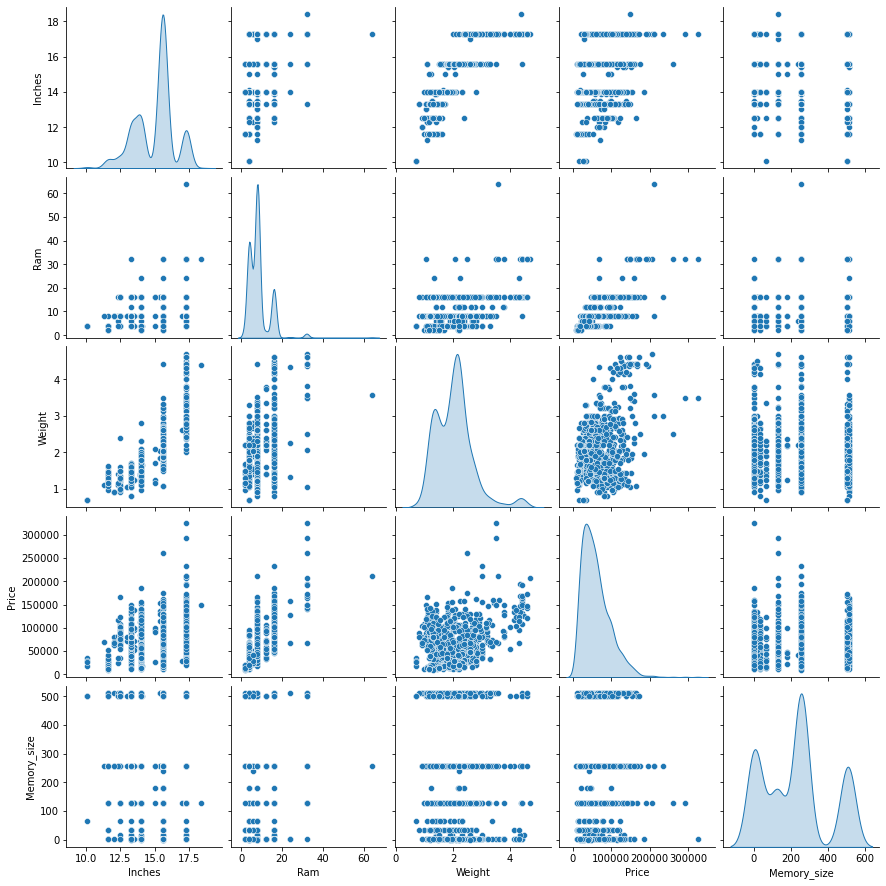

In [37]:
sns.pairplot(df_copy,diag_kind='kde')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

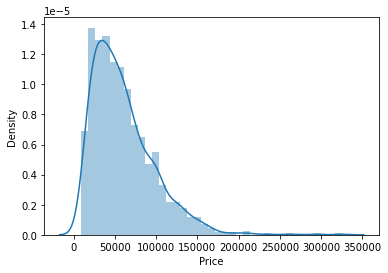

In [38]:
sns.distplot(df.Price)

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


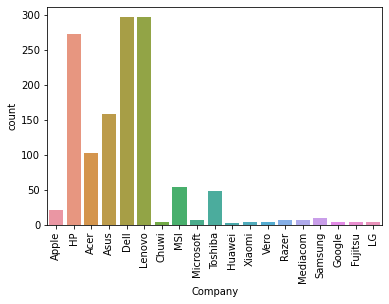

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


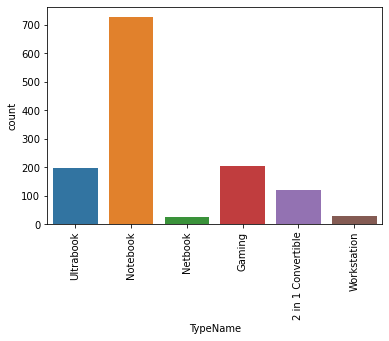

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


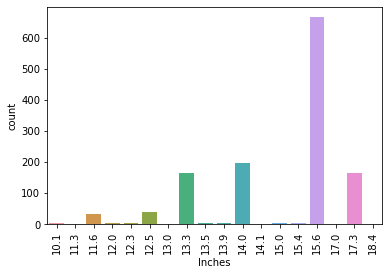

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


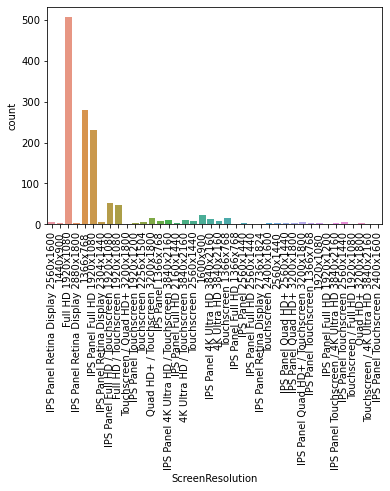

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


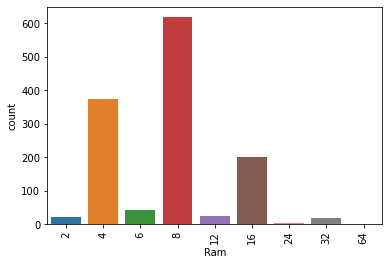

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


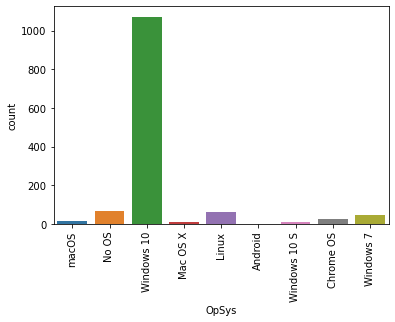

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


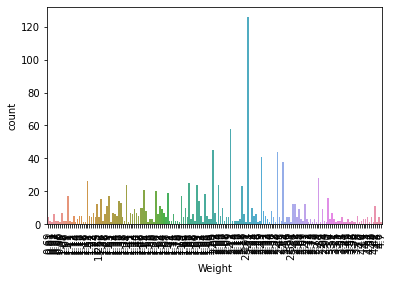

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


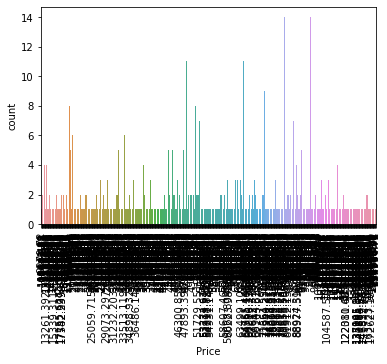

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


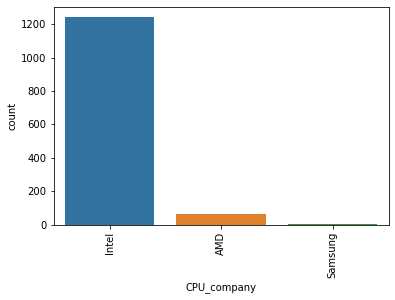

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


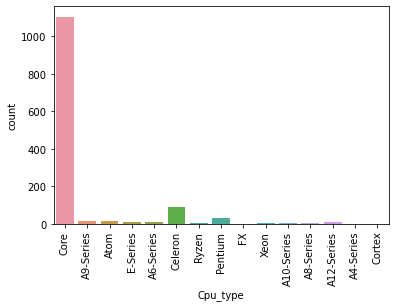

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


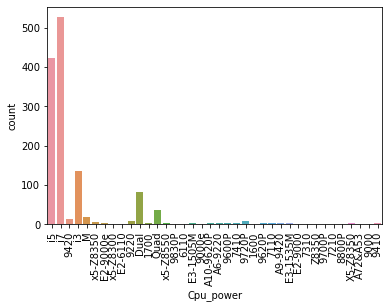

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


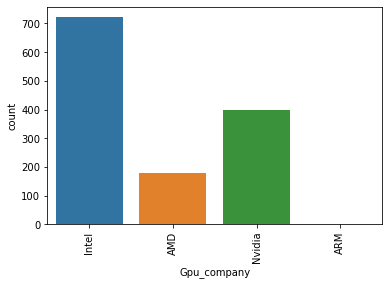

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


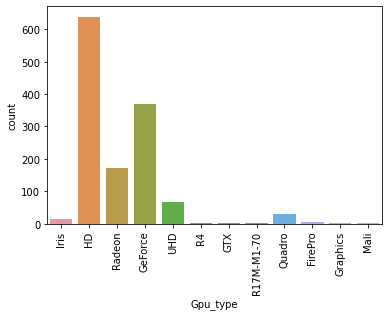

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


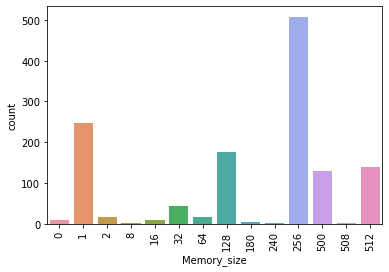

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


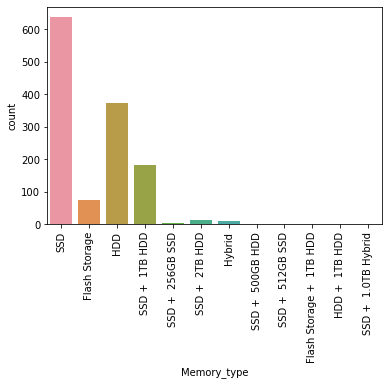

In [39]:
for i in df_copy.columns:
    sns.countplot(df[i])
    plt.xticks(rotation='vertical')
    plt.show()

<AxesSubplot:xlabel='Company', ylabel='Price'>

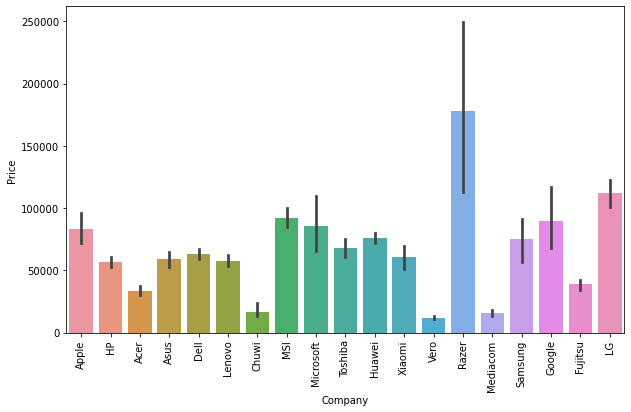

In [40]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
sns.barplot(x=df_copy['Company'],y=df_copy['Price'])

In [41]:

df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD


In [42]:
df_copy.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [43]:
df_copy['Touchscreen'] = df_copy['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)

In [44]:
df_copy['IPS_Panel'] =df_copy['ScreenResolution'].apply(lambda element :1 if 'IPS' in element else 0)

In [45]:
df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD,0,1
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD,0,1


In [48]:
df_copy[['ScreenResolution_X','ScreenResolution_Y']] = df_copy['ScreenResolution'].str.split('x',1,expand=True)

In [49]:
df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,...,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel,ScreenResolution_1,ScreenResolution_2,ScreenResolution_X,ScreenResolution_Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,...,Intel,Iris,128,SSD,0,1,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,...,Intel,HD,128,Flash Storage,0,0,1440,900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,...,Intel,HD,256,SSD,0,0,Full HD 1920,1080,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,...,AMD,Radeon,512,SSD,0,1,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,...,Intel,Iris,256,SSD,0,1,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display 2560,1600


In [53]:
df_copy.drop(['ScreenResolution_1','ScreenResolution_2'],axis=1,inplace=True)

In [54]:
df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel,ScreenResolution_X,ScreenResolution_Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD,0,1,IPS Panel Retina Display 2560,1600


In [65]:
df_sr=df_copy['ScreenResolution_X'].str.extractall('(\d+)').fillna('').reset_index()

In [66]:
df_sr

,level_0,match,0
0,0,0,2560
1,1,0,1440
2,2,0,1920
3,3,0,2880
4,4,0,2560
...,...,...,...
1298,1298,0,1366
1299,1299,0,1920
1300,1300,0,1366
1301,1301,0,1920


In [59]:
df_copy['ScreenResolution_X'] = df_sr[0]

In [60]:
df_copy.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel,ScreenResolution_X,ScreenResolution_Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD,0,1,2560,1600


In [61]:
df_copy.drop('ScreenResolution',axis=1,inplace=True)

In [62]:
df_copy.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel,ScreenResolution_X,ScreenResolution_Y
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD,0,1,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage,0,0,1440,900
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD,0,0,1920,1080
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD,0,1,2880,1800
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD,0,1,2560,1600


In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   int32  
 4   OpSys               1303 non-null   object 
 5   Weight              1303 non-null   float32
 6   Price               1303 non-null   float64
 7   CPU_company         1303 non-null   object 
 8   Cpu_type            1303 non-null   object 
 9   Cpu_power           1303 non-null   object 
 10  Gpu_company         1303 non-null   object 
 11  Gpu_type            1303 non-null   object 
 12  Memory_size         1303 non-null   int32  
 13  Memory_type         1303 non-null   object 
 14  Touchscreen         1303 non-null   int64  
 15  IPS_Panel           1303 non-null   int64  
 16  Screen

In [70]:
df_copy['ScreenResolution_X']=df_copy['ScreenResolution_X'].astype('int32')
df_copy['ScreenResolution_Y']=df_copy['ScreenResolution_Y'].astype('int32')

In [72]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   int32  
 4   OpSys               1303 non-null   object 
 5   Weight              1303 non-null   float32
 6   Price               1303 non-null   float64
 7   CPU_company         1303 non-null   object 
 8   Cpu_type            1303 non-null   object 
 9   Cpu_power           1303 non-null   object 
 10  Gpu_company         1303 non-null   object 
 11  Gpu_type            1303 non-null   object 
 12  Memory_size         1303 non-null   int32  
 13  Memory_type         1303 non-null   object 
 14  Touchscreen         1303 non-null   int64  
 15  IPS_Panel           1303 non-null   int64  
 16  Screen

<AxesSubplot:>

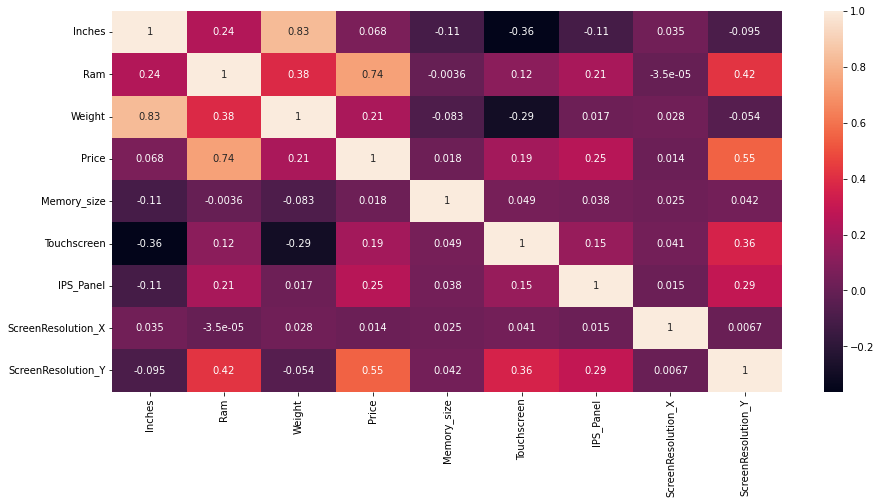

In [75]:
plt.figure(figsize=(15,7))
sns.heatmap(df_copy.corr(),annot=True)

In [76]:
df_copy.corr()['Price']

Inches                0.068197
Ram                   0.743007
Weight                0.210370
Price                 1.000000
Memory_size           0.018322
Touchscreen           0.191226
IPS_Panel             0.252208
ScreenResolution_X    0.013956
ScreenResolution_Y    0.552809
Name: Price, dtype: float64

In [80]:
df_copy.nunique()

Company                19
TypeName                6
Inches                 18
Ram                     9
OpSys                   9
Weight                171
Price                 791
CPU_company             3
Cpu_type               15
Cpu_power              38
Gpu_company             4
Gpu_type               12
Memory_size            14
Memory_type            12
Touchscreen             2
IPS_Panel               2
ScreenResolution_X     14
ScreenResolution_Y     10
dtype: int64

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Core'),
  Text(1, 0, 'A9-Series'),
  Text(2, 0, 'Atom'),
  Text(3, 0, 'E-Series'),
  Text(4, 0, 'A6-Series'),
  Text(5, 0, 'Celeron'),
  Text(6, 0, 'Ryzen'),
  Text(7, 0, 'Pentium'),
  Text(8, 0, 'FX'),
  Text(9, 0, 'Xeon'),
  Text(10, 0, 'A10-Series'),
  Text(11, 0, 'A8-Series'),
  Text(12, 0, 'A12-Series'),
  Text(13, 0, 'A4-Series'),
  Text(14, 0, 'Cortex')])

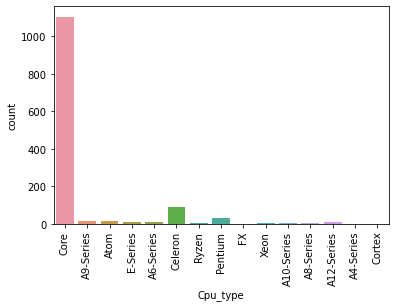

In [83]:
sns.countplot(df_copy['Cpu_type'])
plt.xticks(rotation='vertical')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Samsung')])

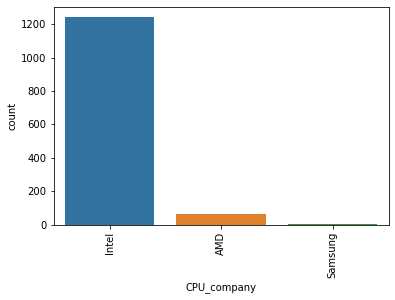

In [84]:
sns.countplot(df_copy['CPU_company'])
plt.xticks(rotation='vertical')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'i5'),
  Text(1, 0, 'i7'),
  Text(2, 0, '9420'),
  Text(3, 0, 'i3'),
  Text(4, 0, 'M'),
  Text(5, 0, 'x5-Z8350'),
  Text(6, 0, 'E2-9000e'),
  Text(7, 0, 'x5-Z8300'),
  Text(8, 0, 'E2-6110'),
  Text(9, 0, '9220'),
  Text(10, 0, 'Dual'),
  Text(11, 0, '1700'),
  Text(12, 0, 'Quad'),
  Text(13, 0, 'x5-Z8550'),
  Text(14, 0, '9830P'),
  Text(15, 0, '6110'),
  Text(16, 0, 'E3-1505M'),
  Text(17, 0, '9000e'),
  Text(18, 0, 'A10-9620P'),
  Text(19, 0, 'A6-9220'),
  Text(20, 0, '9600P'),
  Text(21, 0, '7410'),
  Text(22, 0, '9720P'),
  Text(23, 0, '1600'),
  Text(24, 0, '9620P'),
  Text(25, 0, '7110'),
  Text(26, 0, 'A9-9420'),
  Text(27, 0, 'E3-1535M'),
  Text(28, 0, 'E2-9000'),
  Text(29, 0, '7310'),
  Text(30, 0, 'Z8350'),
  Text(31, 0, '9700P'),
  Text(32, 0, '7210'),
  Text(33, 0, '8800P'),
  Text(34,

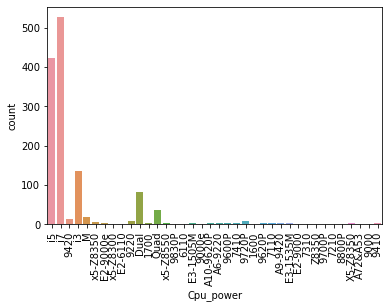

In [85]:
sns.countplot(df_copy['Cpu_power'])
plt.xticks(rotation='vertical')

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Samsung')])

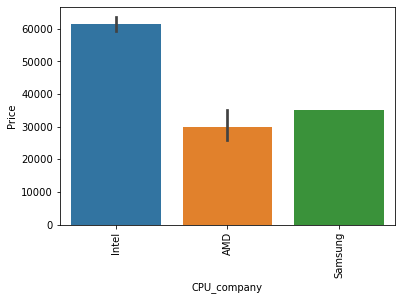

In [86]:
sns.barplot(df_copy['CPU_company'],df_copy['Price'])
plt.xticks(rotation='vertical')

In [88]:
df_copy['CPU_company'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: CPU_company, dtype: int64

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

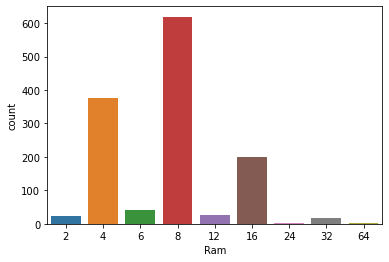

In [89]:
sns.countplot(df_copy['Ram'])

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

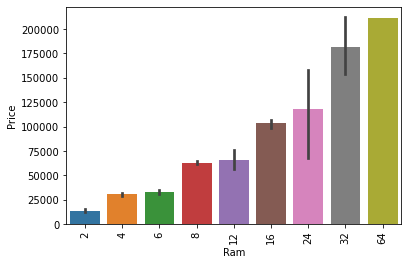

In [90]:
sns.barplot(df_copy['Ram'],df_copy['Price'])
plt.xticks(rotation='vertical')

In [91]:
df_copy.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,CPU_company,Cpu_type,Cpu_power,Gpu_company,Gpu_type,Memory_size,Memory_type,Touchscreen,IPS_Panel,ScreenResolution_X,ScreenResolution_Y
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,Core,i5,Intel,Iris,128,SSD,0,1,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,Core,i5,Intel,HD,128,Flash Storage,0,0,1440,900
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,Core,i5,Intel,HD,256,SSD,0,0,1920,1080
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Intel,Core,i7,AMD,Radeon,512,SSD,0,1,2880,1800
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,Core,i5,Intel,Iris,256,SSD,0,1,2560,1600


C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_company', ylabel='Price'>

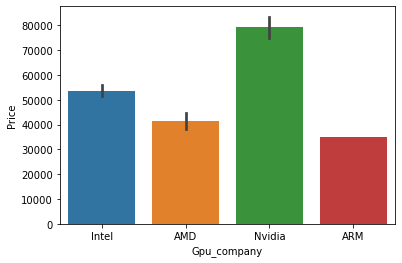

In [93]:
sns.barplot(df_copy['Gpu_company'],df_copy['Price'],estimator=np.mean)

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_company', ylabel='Price'>

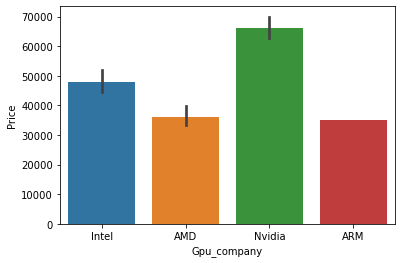

In [94]:
sns.barplot(df_copy['Gpu_company'],df_copy['Price'],estimator=np.median)

In [95]:
df_copy['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

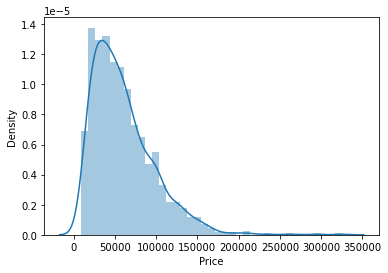

In [109]:
sns.distplot(df_copy['Price'])

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

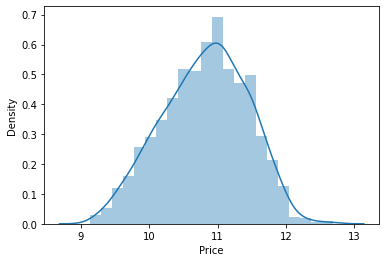

In [110]:
sns.distplot(np.log(df_copy['Price']))